Accuracy: 0.5
F1 Score: 0.5555555555555555
Attack Type Frequency Table: {'Phishing': 4, 'Malware': 3, 'DDoS': 3, 'Ransomware': 3, 'Intrusion': 3}
Firewall Status Frequency Table: {'Blocked': 12, 'Allowed': 4}
Malware Detected Frequency Table: {'No': 10, 'Yes': 6}
Attack Type Likelihood Table: {'Phishing': 0.25, 'Malware': 0.1875, 'DDoS': 0.1875, 'Ransomware': 0.1875, 'Intrusion': 0.1875}
Firewall Status Likelihood Table: {'Blocked': 0.75, 'Allowed': 0.25}
Malware Detected Likelihood Table: {'No': 0.625, 'Yes': 0.375}
Predicted Data Exfiltrated: No


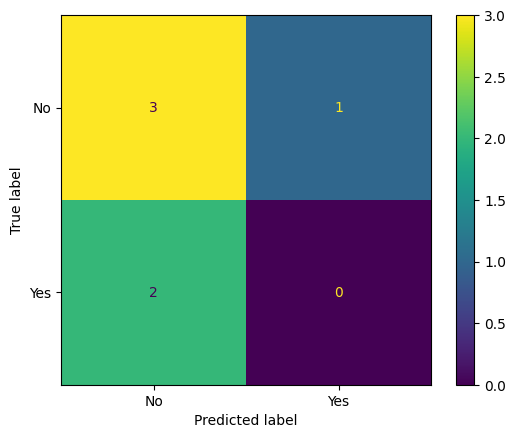

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# Create the dataset as a DataFrame
data = pd.DataFrame({
    "Id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Attack Type": ["Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Phishing"],
    "Firewall Status": ["Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Allowed"],
    "Malware Detected": ["Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No"],
    "Data Exfiltrated": ["No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No"]
})

# Split the dataset into features (X) and target (y)
X = data[["Attack Type", "Firewall Status", "Malware Detected"]]
y = data["Data Exfiltrated"]

# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=["Attack Type", "Firewall Status", "Malware Detected"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=125)

# Create a Gaussian Naïve Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Visualize the confusion matrix
labels = ["No", "Yes"]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# Create frequency tables for each feature
def create_frequency_table(data, feature):
    frequency_table = data[feature].value_counts().to_dict()
    return frequency_table

attack_type_frequency = create_frequency_table(data, "Attack Type")
firewall_status_frequency = create_frequency_table(data, "Firewall Status")
malware_detected_frequency = create_frequency_table(data, "Malware Detected")

print("Attack Type Frequency Table:", attack_type_frequency)
print("Firewall Status Frequency Table:", firewall_status_frequency)
print("Malware Detected Frequency Table:", malware_detected_frequency)

# Create likelihood tables for each feature
def create_likelihood_table(data, feature):
    total_count = len(data)
    likelihood_table = {}
    for value, count in data[feature].value_counts().items():
        likelihood = count / total_count
        likelihood_table[value] = likelihood
    return likelihood_table
# Calculate prediction
target_condition = {"Firewall Status": "Blocked", "Malware Detected": "No"}
count_yes = 0
count_no = 0

for _, entry in data.iterrows():
    if all(entry[key] == value for key, value in target_condition.items()):
        if entry["Data Exfiltrated"] == "Yes":
            count_yes += 1
        elif entry["Data Exfiltrated"] == "No":
            count_no += 1

if count_yes > count_no:
    prediction = "Yes"
else:
    prediction = "No"



attack_type_likelihood = create_likelihood_table(data, "Attack Type")
firewall_status_likelihood = create_likelihood_table(data, "Firewall Status")
malware_detected_likelihood = create_likelihood_table(data, "Malware Detected")

print("Attack Type Likelihood Table:", attack_type_likelihood)
print("Firewall Status Likelihood Table:", firewall_status_likelihood)
print("Malware Detected Likelihood Table:", malware_detected_likelihood)
# Print prediction
print("Predicted Data Exfiltrated:", prediction)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import pandas as pd

# Create the dataset as a DataFrame
data = pd.DataFrame({
    "Id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Attack Type": ["Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Phishing"],
    "Firewall Status": ["Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Allowed"],
    "Malware Detected": ["Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No"],
    "Data Exfiltrated": ["No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No"]
})

# Create frequency tables for each feature
def create_frequency_table(data, feature):
    frequency_table = data[feature].value_counts().to_dict()
    return frequency_table

attack_type_frequency = create_frequency_table(data, "Attack Type")
firewall_status_frequency = create_frequency_table(data, "Firewall Status")
malware_detected_frequency = create_frequency_table(data, "Malware Detected")

print("Attack Type Frequency Table:", attack_type_frequency)
print("Firewall Status Frequency Table:", firewall_status_frequency)
print("Malware Detected Frequency Table:", malware_detected_frequency)

# Create likelihood tables for each feature
def create_likelihood_table(data, feature):
    total_count = len(data)
    likelihood_table = {}
    for value, count in data[feature].value_counts().items():
        likelihood = count / total_count
        likelihood_table[value] = likelihood
    return likelihood_table

attack_type_likelihood = create_likelihood_table(data, "Attack Type")
firewall_status_likelihood = create_likelihood_table(data, "Firewall Status")
malware_detected_likelihood = create_likelihood_table(data, "Malware Detected")

print("Attack Type Likelihood Table:", attack_type_likelihood)
print("Firewall Status Likelihood Table:", firewall_status_likelihood)
print("Malware Detected Likelihood Table:", malware_detected_likelihood)

# Calculate prediction
target_condition = {"Firewall Status": "Blocked", "Malware Detected": "No"}
count_yes = 0
count_no = 0

for _, entry in data.iterrows():
    if all(entry[key] == value for key, value in target_condition.items()):
        if entry["Data Exfiltrated"] == "Yes":
            count_yes += 1
        elif entry["Data Exfiltrated"] == "No":
            count_no += 1

if count_yes > count_no:
    prediction = "Yes"
else:
    prediction = "No"

# Print prediction
print("Predicted Data Exfiltrated:", prediction)


Attack Type Frequency Table: {'Phishing': 4, 'Malware': 3, 'DDoS': 3, 'Ransomware': 3, 'Intrusion': 3}
Firewall Status Frequency Table: {'Blocked': 12, 'Allowed': 4}
Malware Detected Frequency Table: {'No': 10, 'Yes': 6}
Attack Type Likelihood Table: {'Phishing': 0.25, 'Malware': 0.1875, 'DDoS': 0.1875, 'Ransomware': 0.1875, 'Intrusion': 0.1875}
Firewall Status Likelihood Table: {'Blocked': 0.75, 'Allowed': 0.25}
Malware Detected Likelihood Table: {'No': 0.625, 'Yes': 0.375}
Predicted Data Exfiltrated: No


In [ ]:
# Import necessary libraries
import pandas as pd

# Create the dataset as a DataFrame
data = pd.DataFrame({
    "Id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Attack Type": ["Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Malware", "Phishing", "DDoS", "Ransomware", "Intrusion", "Phishing"],
    "Firewall Status": ["Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Blocked", "Allowed", "Blocked", "Blocked", "Blocked", "Allowed"],
    "Malware Detected": ["Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No"],
    "Data Exfiltrated": ["No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No"]
})

# Create frequency tables for each feature
def create_frequency_table(data, feature):
    frequency_table = data[feature].value_counts().to_dict()
    return frequency_table

attack_type_frequency = create_frequency_table(data, "Attack Type")
firewall_status_frequency = create_frequency_table(data, "Firewall Status")
malware_detected_frequency = create_frequency_table(data, "Malware Detected")

print("Attack Type Frequency Table:", attack_type_frequency)
print("Firewall Status Frequency Table:", firewall_status_frequency)
print("Malware Detected Frequency Table:", malware_detected_frequency)

# Create likelihood tables for each feature
def create_likelihood_table(data, feature):
    total_count = len(data)
    likelihood_table = {}
    for value, count in data[feature].value_counts().items():
        likelihood = count / total_count
        likelihood_table[value] = likelihood
    return likelihood_table

attack_type_likelihood = create_likelihood_table(data, "Attack Type")
firewall_status_likelihood = create_likelihood_table(data, "Firewall Status")
malware_detected_likelihood = create_likelihood_table(data, "Malware Detected")

print("Attack Type Likelihood Table:", attack_type_likelihood)
print("Firewall Status Likelihood Table:", firewall_status_likelihood)
print("Malware Detected Likelihood Table:", malware_detected_likelihood)

# Calculate prediction
target_condition = {"Firewall Status": "Blocked", "Malware Detected": "No"}

# Prior probabilities
prior_data_exfiltrated_yes = data["Data Exfiltrated"].value_counts()["Yes"] / len(data)
prior_data_exfiltrated_no = data["Data Exfiltrated"].value_counts()["No"] / len(data)

# Conditional probability of "Firewall Status = Blocked" given "Data Exfiltrated = Yes"
count_firewall_blocked_given_yes = len(data[(data["Data Exfiltrated"] == "Yes") & (data["Firewall Status"] == "Blocked")])
conditional_firewall_blocked_given_yes = count_firewall_blocked_given_yes / len(data[data["Data Exfiltrated"] == "Yes"])

# Conditional probability of "Malware Detected = No" given "Data Exfiltrated = Yes"
count_malware_no_given_yes = len(data[(data["Data Exfiltrated"] == "Yes") & (data["Malware Detected"] == "No")])
conditional_malware_no_given_yes = count_malware_no_given_yes / len(data[data["Data Exfiltrated"] == "Yes"])

# Calculate posterior probability of "Data Exfiltrated = Yes" given the conditions
posterior_data_exfiltrated_yes = prior_data_exfiltrated_yes * conditional_firewall_blocked_given_yes * conditional_malware_no_given_yes

# Calculate posterior probability of "Data Exfiltrated = No" given the conditions
count_firewall_blocked_given_no = len(data[(data["Data Exfiltrated"] == "No") & (data["Firewall Status"] == "Blocked")])
conditional_firewall_blocked_given_no = count_firewall_blocked_given_no / len(data[data["Data Exfiltrated"] == "No"])

count_malware_no_given_no = len(data[(data["Data Exfiltrated"] == "No") & (data["Malware Detected"] == "No")])
conditional_malware_no_given_no = count_malware_no_given_no / len(data[data["Data Exfiltrated"] == "No"])

posterior_data_exfiltrated_no = prior_data_exfiltrated_no * conditional_firewall_blocked_given_no * conditional_malware_no_given_no

# Print posterior probabilities
print("Posterior Probability of Data Exfiltrated = Yes:", posterior_data_exfiltrated_yes)
print("Posterior Probability of Data Exfiltrated = No:", posterior_data_exfiltrated_no)

# Make predictions based on posterior probabilities
if posterior_data_exfiltrated_yes > posterior_data_exfiltrated_no:
    prediction = "Yes"
else:
    prediction = "No"

# Print prediction
print("Predicted Data Exfiltrated:", prediction)


Attack Type Frequency Table: {'Phishing': 4, 'Malware': 3, 'DDoS': 3, 'Ransomware': 3, 'Intrusion': 3}
Firewall Status Frequency Table: {'Blocked': 12, 'Allowed': 4}
Malware Detected Frequency Table: {'No': 10, 'Yes': 6}
Attack Type Likelihood Table: {'Phishing': 0.25, 'Malware': 0.1875, 'DDoS': 0.1875, 'Ransomware': 0.1875, 'Intrusion': 0.1875}
Firewall Status Likelihood Table: {'Blocked': 0.75, 'Allowed': 0.25}
Malware Detected Likelihood Table: {'No': 0.625, 'Yes': 0.375}
Posterior Probability of Data Exfiltrated = Yes: 0.07500000000000001
Posterior Probability of Data Exfiltrated = No: 0.4090909090909091
Predicted Data Exfiltrated: No


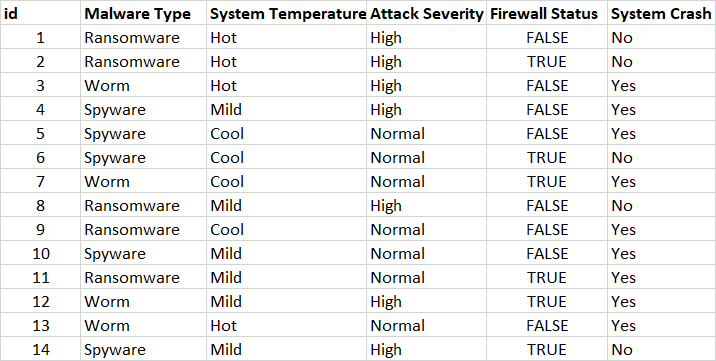

In [ ]:
# Import necessary libraries
import pandas as pd

# Create the dataset as a DataFrame
data = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Malware Type": ["Ransomware", "Ransomware", "Worm", "Spyware", "Spyware", "Spyware", "Worm", "Ransomware", "Ransomware", "Spyware", "Ransomware", "Worm", "Worm", "Spyware"],
    "System Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Attack Severity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Firewall Status": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "System Crash": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
})

# Define the target conditions
target_conditions = {
    "Malware Type": "Ransomware",
    "System Temperature": "Mild",
    "Attack Severity": "Normal",
    "Firewall Status": False
}

# Create a subset of data based on the target conditions
subset_data = data.copy()
for feature, value in target_conditions.items():
    subset_data = subset_data[subset_data[feature] == value]

# Check if there are records matching the target conditions
if len(subset_data) == 0:
    print("No records match the specified target conditions.")
else:
    # Calculate the probabilities
    total_count = len(subset_data)
    count_system_crash_yes = len(subset_data[subset_data["System Crash"] == "Yes"])
    count_system_crash_no = total_count - count_system_crash_yes

    prior_system_crash_yes = count_system_crash_yes / total_count
    prior_system_crash_no = count_system_crash_no / total_count

    # Calculate posterior probabilities
    system_crash_given_yes = count_system_crash_yes / total_count
    system_crash_given_no = count_system_crash_no / total_count

    # Print posterior probabilities
    print("Prior Probability of System Crash = Yes:", prior_system_crash_yes)
    print("Prior Probability of System Crash = No:", prior_system_crash_no)
    print("Posterior Probability of System Crash = Yes:", system_crash_given_yes)
    print("Posterior Probability of System Crash = No:", system_crash_given_no)

    # Make a prediction based on posterior probabilities
    if system_crash_given_yes > system_crash_given_no:
        prediction = "Yes"
    else:
        prediction = "No"

    # Print prediction
    print("Predicted System Crash:", prediction)


No records match the specified target conditions.
